In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
#Exportar archivo
data = pd.read_csv("datossaber11.csv")

In [42]:
# Calcular estadísticas descriptivas
descriptive_stats = data.describe()
print(descriptive_stats)

             periodo  estu_tipodocumento  cole_area_ubicacion  cole_bilingue  \
count  471863.000000       471863.000000        471863.000000  471863.000000   
mean    20208.269890            0.852695             0.073939       0.019936   
std        14.890389            0.360152             0.261672       0.139780   
min     20191.000000            0.000000             0.000000       0.000000   
25%     20194.000000            1.000000             0.000000       0.000000   
50%     20194.000000            1.000000             0.000000       0.000000   
75%     20224.000000            1.000000             0.000000       0.000000   
max     20224.000000            3.000000             1.000000       1.000000   

       cole_calendario  cole_caracter    cole_genero  estu_depto_presentacion  \
count    471863.000000  471863.000000  471863.000000            471863.000000   
mean          0.024342       1.667062       0.077785                 0.536478   
std           0.154108       0.53377

In [43]:
# Filtrar datos para Antioquia y Bogotá
antioquia = data[data['estu_depto_presentacion'] == 0]
bogota = data[data['estu_depto_presentacion'] == 1]

In [44]:
# Estadísticas descriptivas para Antioquia
print("Estadísticas descriptivas para Antioquia:")
print(antioquia['punt_global'].describe())

# Estadísticas descriptivas para Bogotá
print("Estadísticas descriptivas para Bogotá:")
print(bogota['punt_global'].describe())

Estadísticas descriptivas para Antioquia:
count    218719.000000
mean        249.428545
std          51.851988
min         100.000000
25%         209.000000
50%         247.000000
75%         287.000000
max         477.000000
Name: punt_global, dtype: float64
Estadísticas descriptivas para Bogotá:
count    253144.000000
mean        274.375956
std          50.051761
min          75.000000
25%         238.000000
50%         274.000000
75%         310.000000
max         479.000000
Name: punt_global, dtype: float64


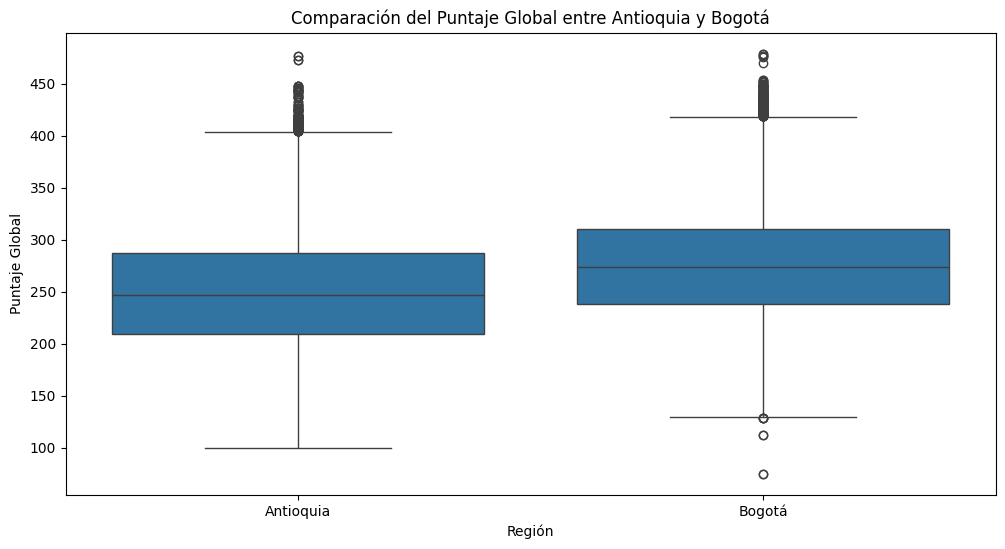

In [45]:
# Visualización con boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='estu_depto_presentacion', y='punt_global', data=data)
plt.title('Comparación del Puntaje Global entre Antioquia y Bogotá')
plt.xticks([0, 1], ['Antioquia', 'Bogotá'])
plt.ylabel('Puntaje Global')
plt.xlabel('Región')
plt.show()

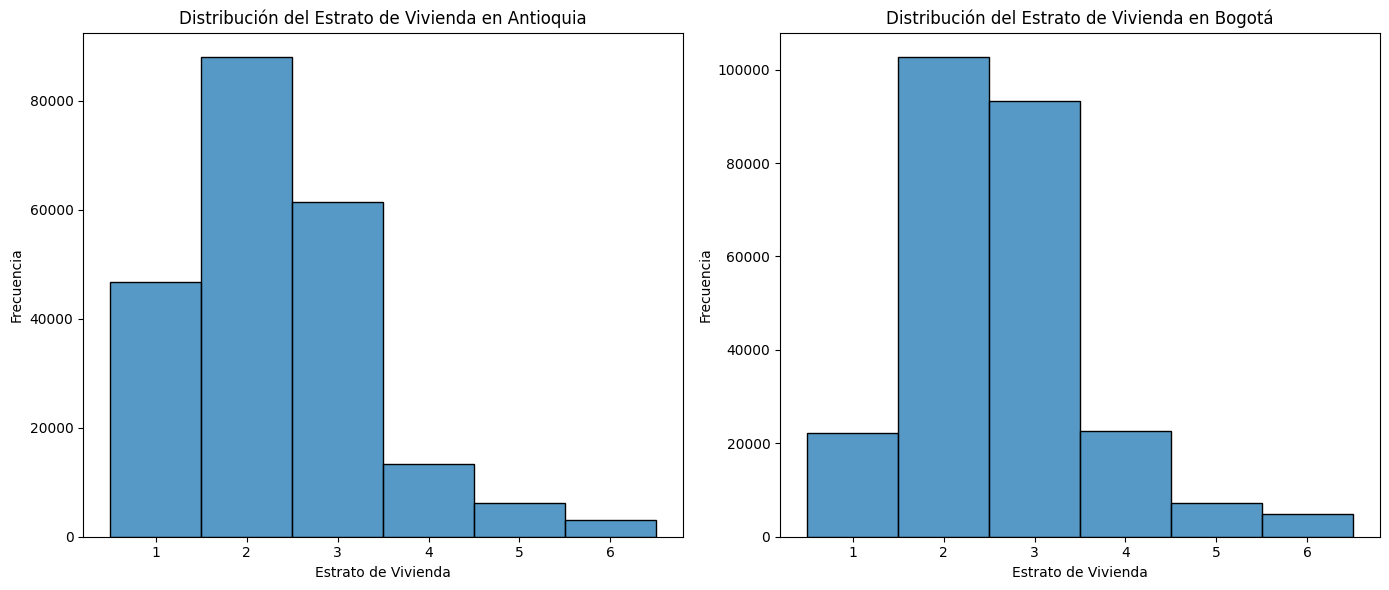

In [46]:
# Ajustar el tamaño de las figuras
plt.figure(figsize=(14, 6))

# Histograma del estrato de vivienda para Antioquia
plt.subplot(1, 2, 1)
sns.histplot(antioquia['fami_estratovivienda'], bins=6, discrete=True)
plt.title('Distribución del Estrato de Vivienda en Antioquia')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Frecuencia')

# Histograma del estrato de vivienda para Bogotá
plt.subplot(1, 2, 2)
sns.histplot(bogota['fami_estratovivienda'], bins=6, discrete=True)
plt.title('Distribución del Estrato de Vivienda en Bogotá')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

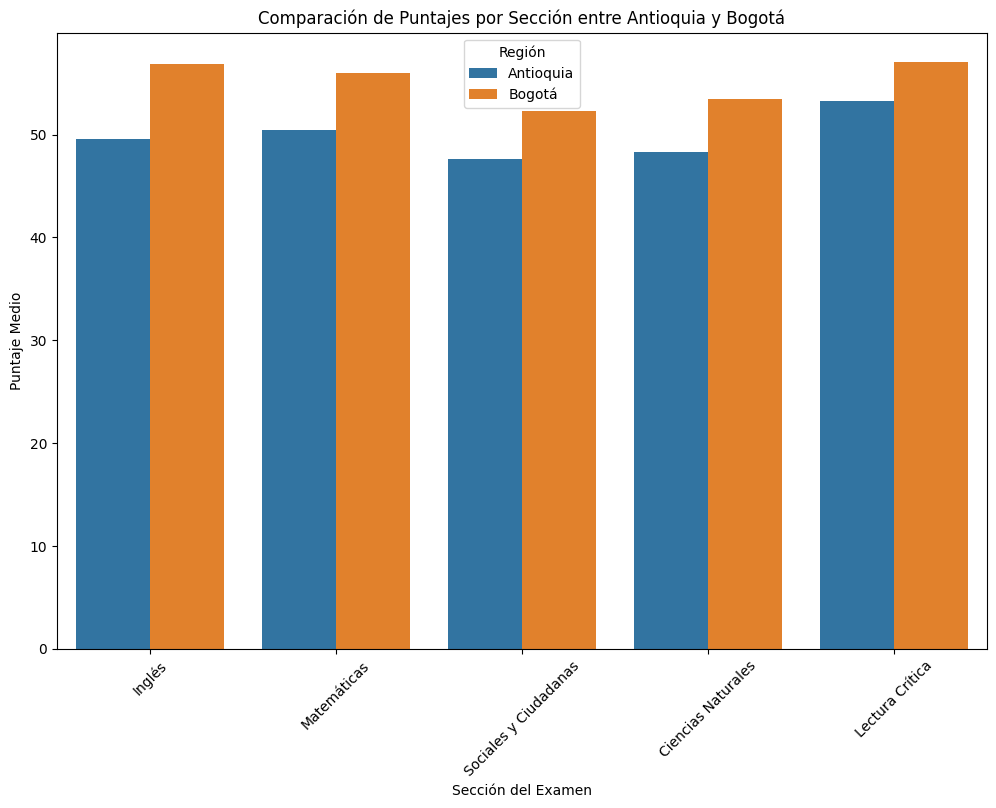

In [47]:
# Calcular las medias de los puntajes por sección para cada región
mean_scores_antioquia = antioquia[['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica']].mean()
mean_scores_bogota = bogota[['punt_ingles', 'punt_matematicas', 'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica']].mean()

# Crear un DataFrame con los puntajes medios
mean_scores_df = pd.DataFrame({
    'Sección': ['Inglés', 'Matemáticas', 'Sociales y Ciudadanas', 'Ciencias Naturales', 'Lectura Crítica'],
    'Antioquia': mean_scores_antioquia.values,
    'Bogotá': mean_scores_bogota.values
})

# Derretir el DataFrame para seaborn
mean_scores_melted = mean_scores_df.melt(id_vars='Sección', var_name='Región', value_name='Puntaje Medio')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='Sección', y='Puntaje Medio', hue='Región', data=mean_scores_melted)
plt.title('Comparación de Puntajes por Sección entre Antioquia y Bogotá')
plt.xlabel('Sección del Examen')
plt.ylabel('Puntaje Medio')
plt.legend(title='Región')
plt.xticks(rotation=45)
plt.show()

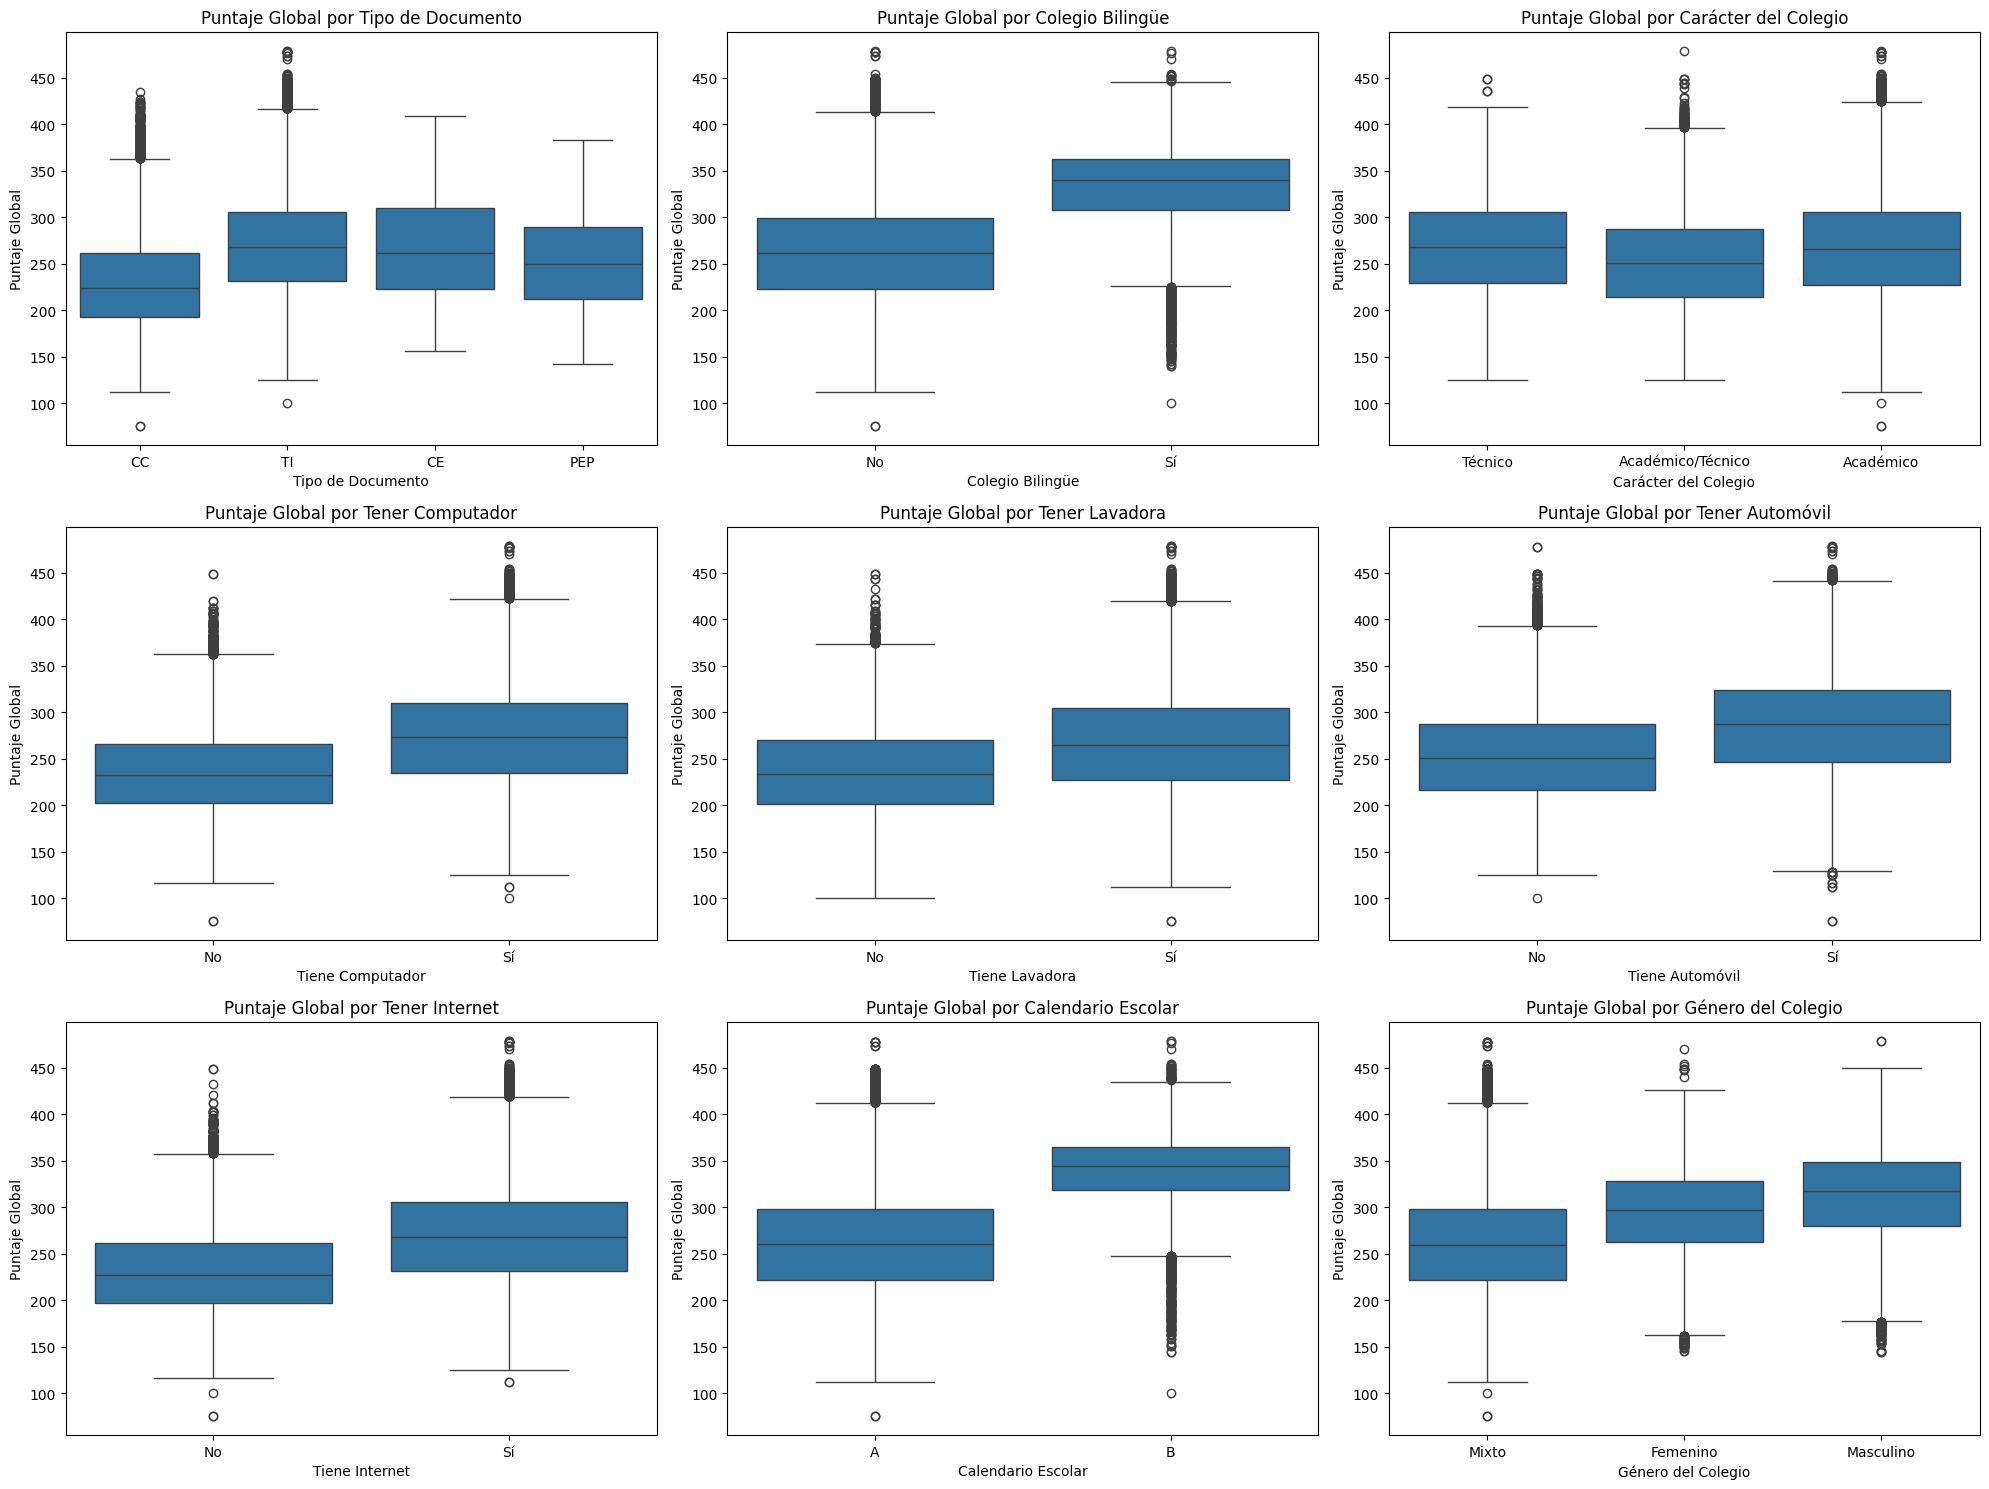

In [48]:
# Ajustar el tamaño de las figuras
plt.figure(figsize=(20, 15))

# Diagrama de caja para tipo de documento
plt.subplot(3, 3, 1)
sns.boxplot(x='estu_tipodocumento', y='punt_global', data=data)
plt.title('Puntaje Global por Tipo de Documento')
plt.xlabel('Tipo de Documento')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1, 2, 3], labels=['CC', 'TI', 'CE', 'PEP'])

# Diagrama de caja para colegio bilingüe
plt.subplot(3, 3, 2)
sns.boxplot(x='cole_bilingue', y='punt_global', data=data)
plt.title('Puntaje Global por Colegio Bilingüe')
plt.xlabel('Colegio Bilingüe')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Diagrama de caja para carácter del colegio
plt.subplot(3, 3, 3)
sns.boxplot(x='cole_caracter', y='punt_global', data=data)
plt.title('Puntaje Global por Carácter del Colegio')
plt.xlabel('Carácter del Colegio')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1, 2], labels=['Técnico', 'Académico/Técnico', 'Académico'])

# Diagrama de caja para tener computador
plt.subplot(3, 3, 4)
sns.boxplot(x='fami_tienecomputador', y='punt_global', data=data)
plt.title('Puntaje Global por Tener Computador')
plt.xlabel('Tiene Computador')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Diagrama de caja para tener lavadora
plt.subplot(3, 3, 5)
sns.boxplot(x='fami_tienelavadora', y='punt_global', data=data)
plt.title('Puntaje Global por Tener Lavadora')
plt.xlabel('Tiene Lavadora')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Diagrama de caja para tener automóvil
plt.subplot(3, 3, 6)
sns.boxplot(x='fami_tieneautomovil', y='punt_global', data=data)
plt.title('Puntaje Global por Tener Automóvil')
plt.xlabel('Tiene Automóvil')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Diagrama de caja para tener internet
plt.subplot(3, 3, 7)
sns.boxplot(x='fami_tieneinternet', y='punt_global', data=data)
plt.title('Puntaje Global por Tener Internet')
plt.xlabel('Tiene Internet')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])

# Diagrama de caja para calendario escolar
plt.subplot(3, 3, 8)
sns.boxplot(x='cole_calendario', y='punt_global', data=data)
plt.title('Puntaje Global por Calendario Escolar')
plt.xlabel('Calendario Escolar')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['A', 'B'])

# Diagrama de caja para género del colegio
plt.subplot(3, 3, 9)
sns.boxplot(x='cole_genero', y='punt_global', data=data)
plt.title('Puntaje Global por Género del Colegio')
plt.xlabel('Género del Colegio')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1, 2], labels=['Mixto', 'Femenino', 'Masculino'])

plt.tight_layout()
plt.show()

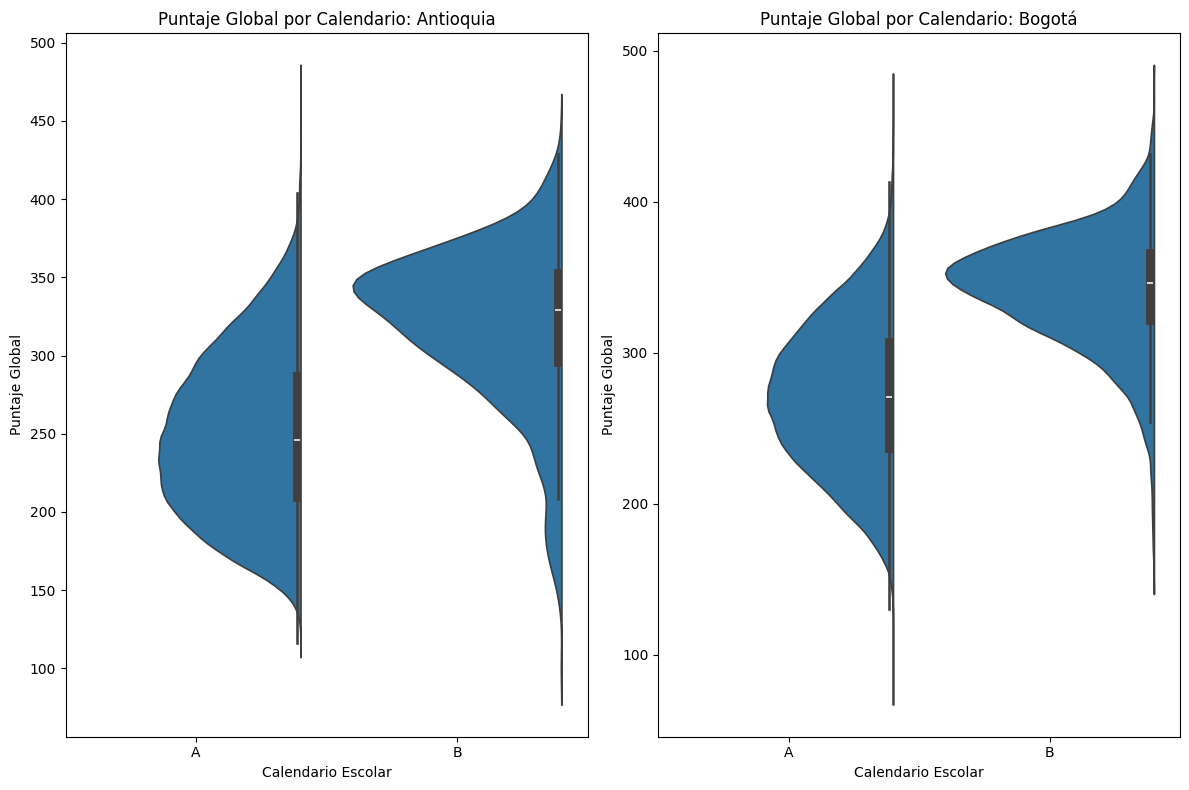

In [49]:
# Ajustar el tamaño de las figuras
plt.figure(figsize=(12, 8))

# Gráfico para Antioquia
plt.subplot(1, 2, 1)
sns.violinplot(x='cole_calendario', y='punt_global', data=data[data['estu_depto_presentacion'] == 0], split=True)
plt.title('Puntaje Global por Calendario: Antioquia')
plt.xlabel('Calendario Escolar')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['A', 'B'])
# Gráfico para Bogotá
plt.subplot(1, 2, 2)
sns.violinplot(x='cole_calendario', y='punt_global', data=data[data['estu_depto_presentacion'] == 1], split=True)
plt.title('Puntaje Global por Calendario: Bogotá')
plt.xlabel('Calendario Escolar')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['A', 'B'])

plt.tight_layout()
plt.show()

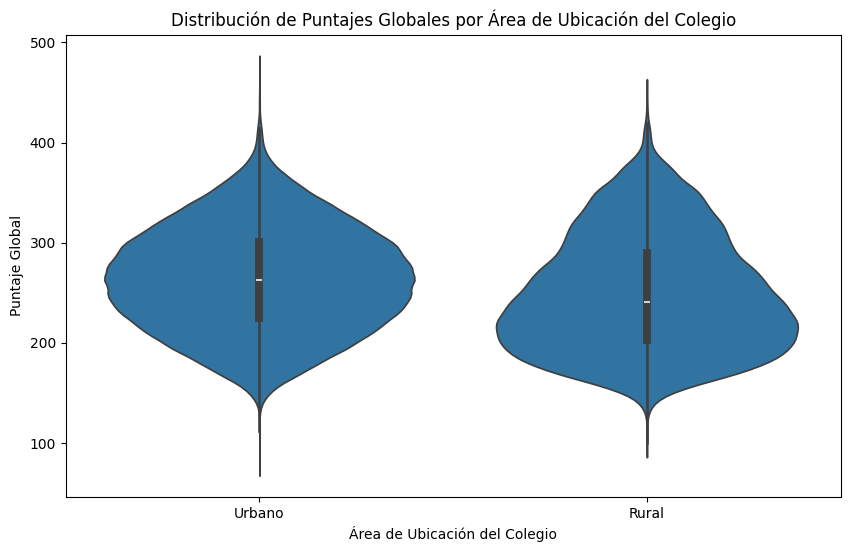

In [50]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de violín
sns.violinplot(x='cole_area_ubicacion', y='punt_global', data=data)
plt.title('Distribución de Puntajes Globales por Área de Ubicación del Colegio')
plt.xlabel('Área de Ubicación del Colegio')
plt.ylabel('Puntaje Global')
plt.xticks(ticks=[0, 1], labels=['Urbano', 'Rural'])

plt.show()

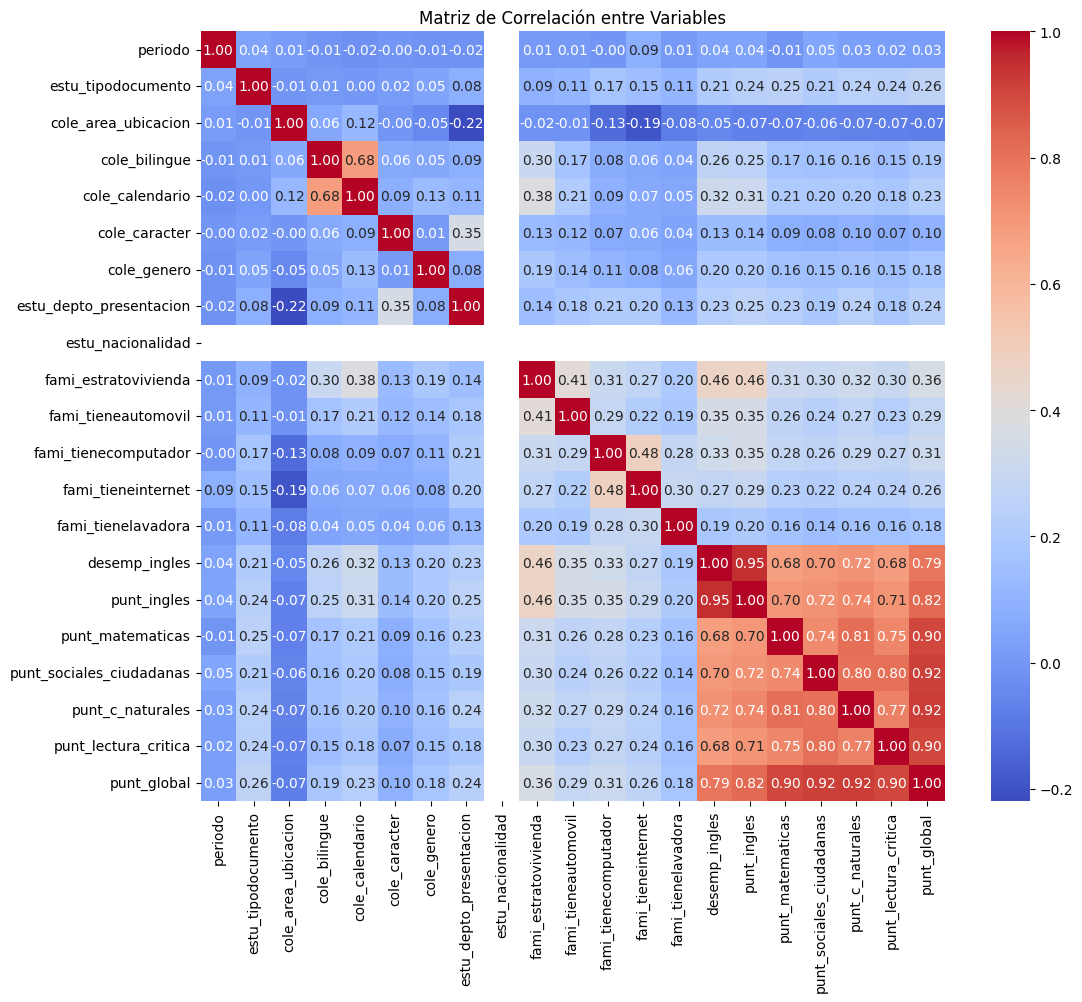

In [52]:
# Calcular la matriz de correlación
correlation_matrix = data.corr()

# Crear el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Matriz de Correlación entre Variables')
plt.show()